# Results Analysis

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time
from datetime import timedelta

### Load dataset

In [46]:
# read from csv
input_file_name = "results_id11010024.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)
test =  pd.read_csv(input_file_path, index_col=[0,1])

print test.loc[20].shape[0]
test.loc[20].tail()

27856


,true,last value,previous day,previous week,offline,batch
values,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414


In [47]:
# read from csv
input_file_name = "results_id11010024_20_AR_WF_DT.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)
a =  pd.read_csv(input_file_path)

a.shape

(104471, 2)

In [45]:
testing_set_point = test.loc[20].shape[0]

a[-testing_set_point:].tail()

,target,prediction
104466,0.6,0.70
104467,0.7,0.70
104468,0.6,0.70
104469,0.8,0.68
104470,0.6,0.68


In [55]:
subset = a[-testing_set_point:]

In [56]:
print test.loc[20].shape
print subset.shape

(27856, 6)
(27856, 2)


In [50]:
test.loc[20].tail()

,true,last value,previous day,previous week,offline,batch
values,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414


In [112]:
subset.index = b.index

In [114]:
b = test.loc[20]
subset.index = b.index
b['online'] = subset['prediction']
b.tail()

,true,last value,previous day,previous week,offline,batch,online
values,,,,,,,
2015-02-01 02:45:00,0.7,0.6,0.7,0.8,0.702865,0.704483,0.70
2015-02-01 03:00:00,0.7,0.7,0.8,0.6,0.639371,0.692192,0.70
2015-02-01 03:15:00,0.7,0.8,0.7,0.7,0.625313,0.682858,0.70
2015-02-01 03:30:00,0.8,0.7,0.7,0.6,0.627194,0.694418,0.68
2015-02-01 03:45:00,0.7,0.7,0.6,0.7,0.627194,0.690414,0.68


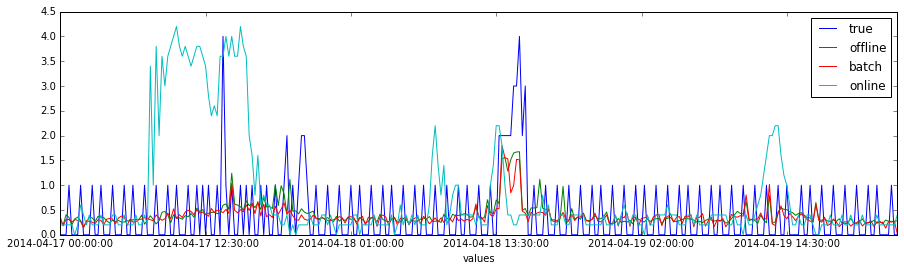

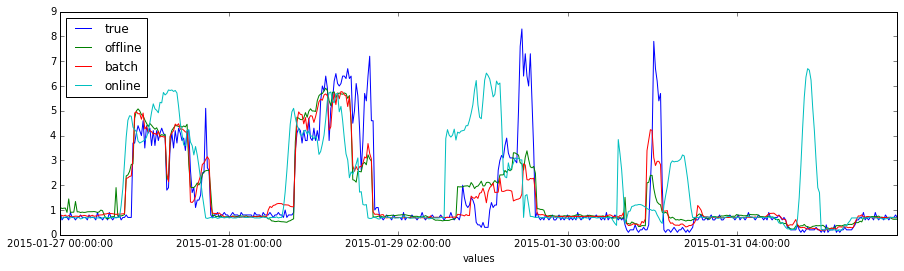

In [116]:
b['2014-04-17 00:00:00':'2014-04-20 00:00:00'][['true','offline','batch', 'online']].plot(figsize=(15,4))
b['2015-01-27 00:00:00':'2015-02-01 23:59:00'][['true','offline','batch', 'online']].plot(figsize=(15,4))

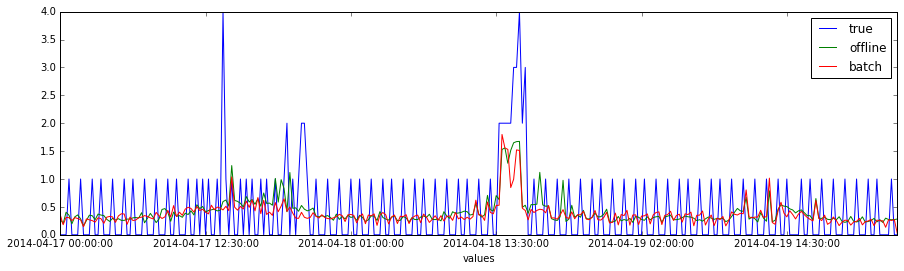

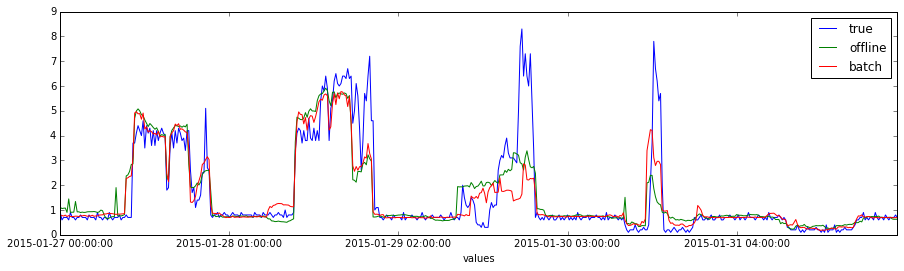

In [12]:
test.loc[20]['2014-04-17 00:00:00':'2014-04-20 00:00:00'][['true','offline','batch']].plot(figsize=(15,4))
test.loc[20]['2015-01-27 00:00:00':'2015-02-01 23:59:00'][['true','offline','batch']].plot(figsize=(15,4))

In [21]:
from sklearn.metrics import r2_score

def r2( g ):
    r2_lv = r2_score( g['true'], g['last value'] )
    r2_pd = r2_score( g['true'], g['previous day'] )
    r2_pw = r2_score( g['true'], g['previous week'] )
    r2_offline = r2_score( g['true'], g['offline'] )
    r2_batch = r2_score( g['true'], g['batch'] )
    return pd.Series( dict(  r2_lv=r2_lv, r2_pd=r2_pd, r2_pw=r2_pw, r2_offline=r2_offline, r2_batch=r2_batch ) )

#subset = test['2014-04-17 00:00:00':'2014-04-27 00:00:00']
subset = test.loc[20]['2015-01-05 00:00:00':'2015-02-01 23:59:00']
#subset = test['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)
a

C:\Python27\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


,r2_batch,r2_lv,r2_offline,r2_pd,r2_pw
5,0.650629,-0.466792,0.631788,0.410490,-0.029031
6,0.687785,-0.337743,0.684113,0.809421,-0.893095
7,0.701322,-0.736158,0.687807,0.706376,-1.157494
8,0.624968,-1.965073,0.515317,-0.118795,0.481865
9,0.678785,-0.601358,0.578641,-1.546461,0.868344
10,0.468132,-29.816674,0.582218,-32.056645,0.693515
11,0.521862,-1.057234,0.746526,-1.146427,0.833297
12,0.758160,-0.359141,0.692031,0.864793,0.399927
13,0.909564,-0.096185,0.953991,0.629611,0.690272
14,0.873872,-0.491005,0.875105,0.927543,0.734044


Bar plot for last month. Major improvement for batch is not visible.

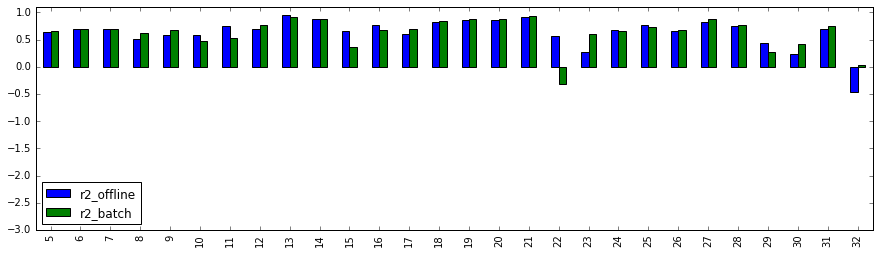

In [22]:
a[['r2_offline','r2_batch']].plot( kind='bar', figsize=(15,4), ylim=(-3, 1.1))

Diff is not very informative

C:\Python27\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


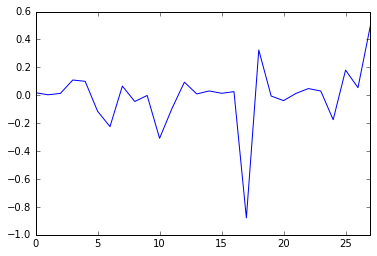

In [23]:
#subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
#a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch']]
b['diff'] = b['r2_batch'] - b['r2_offline']
b.reset_index()['diff'].plot()

Scatter plot for entire testing dataset.

C:\Python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


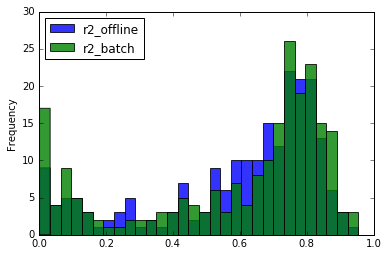

In [24]:
subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch']]
#a[['r2_offline','r2_batch']].plot( kind='hist', figsize=(15,4))
#a[['r2_offline','r2_batch']].hist(figsize=(15,4), bins=20)
#a[['r2_offline','r2_batch']].plot.hist(bins=30)
b[b > 0].plot.hist(bins=30, alpha=0.8)

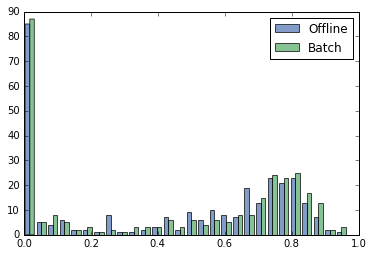

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

b = a[['r2_offline','r2_batch']]

c = b[b > 0].reset_index()[['r2_offline','r2_batch']]

c = c.fillna(0)

x = c["r2_offline"].values
y = c["r2_batch"].values
data = np.vstack([x, y]).T
bins = np.linspace(0, 1, 30)

plt.hist(data, bins, alpha=0.7, label=['Offline', 'Batch'])
plt.legend(loc='upper right')
plt.show()

C:\Python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


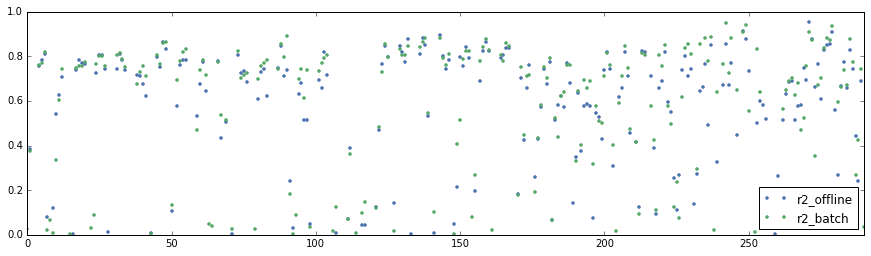

In [26]:
subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch']]

#a[['r2_offline','r2_batch']].plot( figsize=(15,4), marker='*')
b[b > 0].reset_index()[['r2_offline','r2_batch']].plot( figsize=(15,4), marker='.', linestyle='')

Scatter plot for entire testing dataset with regression plot trend, showing that Batch is better. Unfortunatelly the trend is downword. Maybe try with different sensor.

C:\Python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


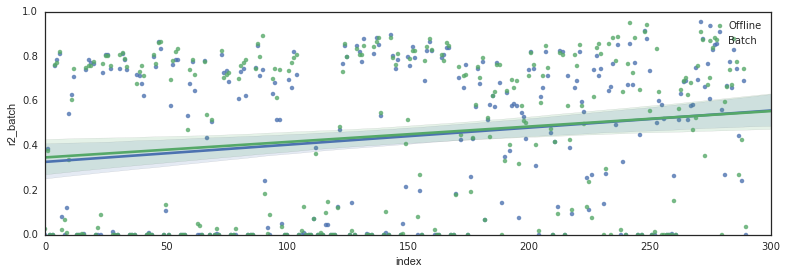

In [31]:
import seaborn as sns

sns.set_style("white")

subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(r2)

b = a[['r2_offline','r2_batch']]

#c = b.reset_index()[['r2_offline','r2_batch']]
c = b[b > 0].reset_index()[['r2_offline','r2_batch']]
c = c.fillna(0)
c['index'] = c.index

plt.figure(figsize=(13,4))
#sns.pairplot(c, size=5, aspect=.8, kind="reg");
g = sns.regplot(y="r2_offline", x="index", data=c, label='Offline');
g.set(xlim=(0,300), ylim=(0,1))
sns.regplot(y="r2_batch", x="index", data=c, label='Batch');

plt.legend(loc='upper right')
plt.show()

In [28]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print "Offline slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[1].get_xdata(),y=g.get_lines()[1].get_ydata())
print "Batch slope:", slope

Offline slope: -0.000525964532375
Batch slope: -0.00329930970361


## MAPE analysis

In [33]:
import regression_metrics as additional_metrics

def mape(g):
    mape_lv = additional_metrics.mean_absolute_percentage_error( g['true'], g['last value'] )
    mape_pd = additional_metrics.mean_absolute_percentage_error( g['true'], g['previous day'] )
    mape_pw = additional_metrics.mean_absolute_percentage_error( g['true'], g['previous week'] )
    mape_offline = additional_metrics.mean_absolute_percentage_error( g['true'], g['offline'] )
    mape_batch = additional_metrics.mean_absolute_percentage_error( g['true'], g['batch'] )
    return pd.Series( dict(  mape_lv=mape_lv, mape_pd=mape_pd, mape_pw=mape_pw, mape_offline=mape_offline, mape_batch=mape_batch ) )

C:\Python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  from ipykernel import kernelapp as app


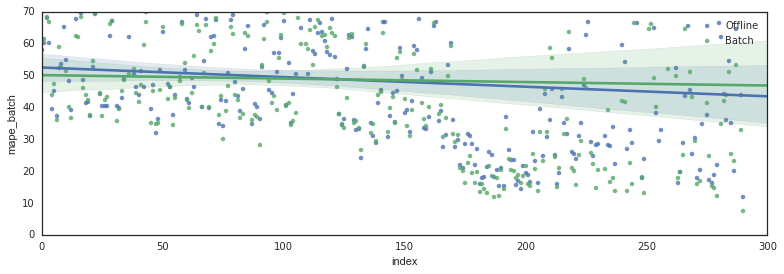

In [34]:
subset = test.loc[20]['2014-04-17 00:00:00':'2015-02-01 23:59:00']
a=subset.groupby(subset.index.to_datetime().dayofyear, sort=False).apply(mape)
a

b = a[['mape_offline','mape_batch']]

c = b[b > 0].reset_index()[['mape_offline','mape_batch']]
c = c.fillna(0)
#c = b.reset_index()[['mape_offline','mape_batch']]
c['index'] = c.index

plt.figure(figsize=(13,4))
#sns.pairplot(c, size=5, aspect=.8, kind="reg");
g = sns.regplot(y="mape_offline", x="index", data=c, label='Offline');
g.set(xlim=(0,300), ylim=(0,70))
sns.regplot(y="mape_batch", x="index", data=c, label='Batch');

plt.legend(loc='upper right')
plt.show()

In [35]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(),y=g.get_lines()[0].get_ydata())
print "Offline slope:", slope

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=g.get_lines()[1].get_xdata(),y=g.get_lines()[1].get_ydata())
print "Batch slope:", slope

Offline slope: -0.0301269784077
Batch slope: -0.0108998422488


## Future work

- more horizons
- more sensors
- online approach